# Clustering With K Means

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
# Dataset Link
url='https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv'

In [24]:
df = pd.read_csv(url,sep=',') # use sep=','for coma separation.letter between comma considered as column 
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [25]:
df['Age']

0     27
1     29
2     29
3     28
4     42
5     39
6     41
7     38
8     36
9     35
10    37
11    26
12    27
13    28
14    29
15    32
16    40
17    41
18    43
19    39
20    41
21    39
Name: Age, dtype: int64

In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
type(df['Age'])

pandas.core.series.Series

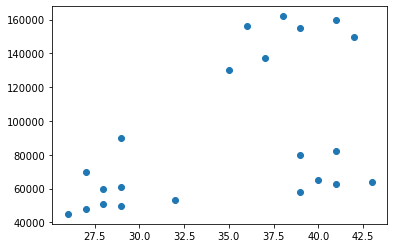

In [28]:
# Plotting scatterplot
plt.scatter(df['Age'],df['Income($)'])

In [33]:
# Understanding 2D Dataframe
df[['Age','Income($)']]

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [32]:
type(df[['Age','Income($)']])

pandas.core.frame.DataFrame

In [29]:
# Selecting clusters=3 by observation
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']]) # to ignore 'Name ' column which is string
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [38]:
km

KMeans(n_clusters=3)

In [37]:
# Checking Parameters' of K-means
km.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [39]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [34]:
type(y_predicted)

numpy.ndarray

In [35]:
# including 'y_predicted' in df
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [42]:
df[df.cluster==0]

,Name,Age,Income($),cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


In [45]:
df1 = df[df.cluster==0] #Creating object to acess values

In [46]:
df1.Age # Accesing only age column values

2     29
3     28
11    26
12    27
13    28
14    29
15    32
16    40
17    41
18    43
21    39
Name: Age, dtype: int64

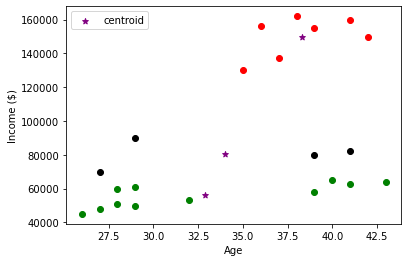

In [40]:
# plotting sactter plot
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [48]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [49]:
# Selecting clusters=3 by observation
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']]) # to ignore 'Name ' column which is string
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [50]:
# including 'y_predicted' in df
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [53]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

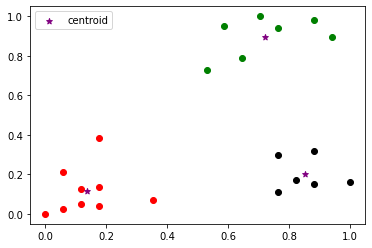

In [52]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

# plotting centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') #it is array
plt.legend()

# Elbow Plot

In [54]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

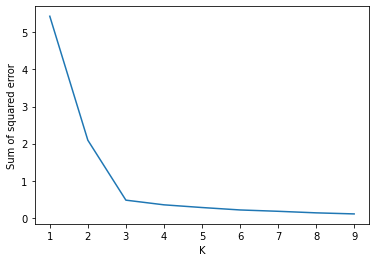

In [55]:
# ploting on graph
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)